# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file = '../data/valid.p' 
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**
 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (34799, 32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

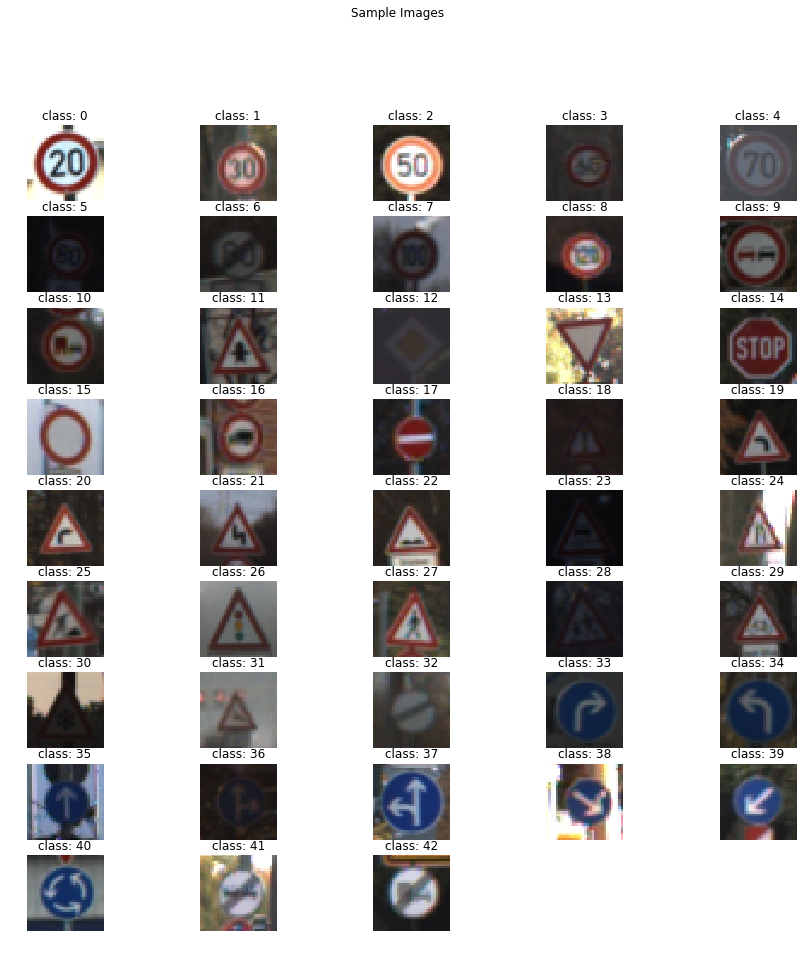

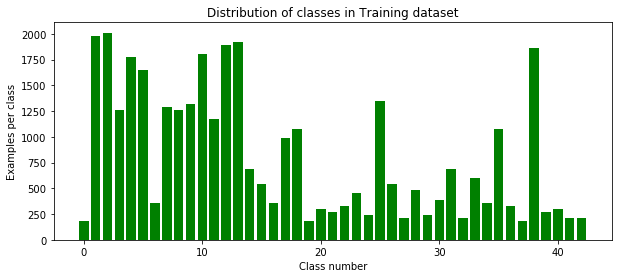

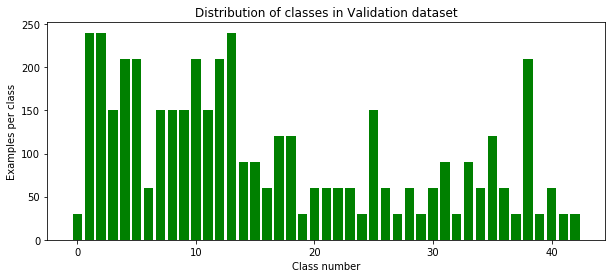

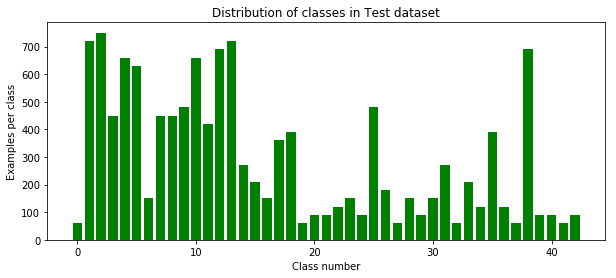

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
from IPython.display import Image
import pandas as pd
from matplotlib import gridspec
import random

def show_images(image_dataset, graph_title='Sample Images'):
    '''
    function for display one sample image from each class from a specific dataset
    '''
    plt.figure(figsize=(15, 16.5))
    #selected_classes = np.random.randint(44, size=n_rows)
    image_number = 1
    for i in range(0, n_classes):
        plt.subplot(10, 5, i+1)        
        x_selected = X_train[y_train == i]
        random_index = np.random.randint(x_selected.shape[0])
        plt.imshow(x_selected[random_index, :, :, :]) 
        plt.axis('off')
        plt.title('class: {}'.format(i))  
    plt.suptitle(graph_title)
    plt.show()
    
    
def class_distribution(class_labels, dataset_name):
    '''This function is used to plot number of examples per class in a dataset'''
    plt.figure(figsize=(10, 4))
    examples_per_class = np.bincount(class_labels)
    num_classes = len(examples_per_class)
    plt.bar(np.arange(num_classes), examples_per_class, 0.8, color='g') #, label='Inputs per class')
    plt.xlabel('Class number')
    plt.ylabel('Examples per class')
    plt.title('Distribution of classes in ' + dataset_name)
    plt.show()   
    
show_images(X_train)
class_distribution(y_train, "Training dataset")
class_distribution(y_valid, "Validation dataset")
class_distribution(y_test, "Test dataset")


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, we should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

We process the image data to be normalized so that the data has mean zero and equal variance, data_normalization() method achives that. Sometime an additional pre-procesing is done on images to normalizes each dimension so that the min and max along the dimension is -1 and 1 respectively. But in this case, the relative scales of pixels are already approximately equal (and in range from 0 to 255), so it is not strictly necessary to perform this additional pre-processing step.

Another pre-processing approach is PCA Whitening. But the problem with transformation is that it can greatly exaggerate the noise in the data, since it stretches all dimensions to be of equal size in the input. This was also not performed here.

In practice, these transformations are not used with Convolutional Neural Networks except to zero-center the data. And it is also common to see normalization of every pixel.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.

import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import pickle

def data_normalization(X_feature):
    x_feature = X_feature.astype(np.float32)
    x_feature -= np.mean(x_feature, axis=0) # zero-center
    x_feature /= np.std(x_feature, axis=0)  # normalize
    return x_feature

from tensorflow.contrib.layers import flatten

# zero-center and normalize the data
X_train_prep = data_normalization(X_train)
X_valid_prep = data_normalization(X_valid)
X_test_prep = data_normalization(X_test)
print("preprocessed train image data shape =", X_train_prep.shape)
print("preprocessed valid image data shape =", X_valid_prep.shape)
print("preprocessed test image data shape =", X_test_prep.shape)

preprocessed train image data shape = (34799, 32, 32, 3)
preprocessed valid image data shape = (4410, 32, 32, 3)
preprocessed test image data shape = (12630, 32, 32, 3)


### Data Augmentation

Huge dataset is a crucial point for training a deep lerning network to produce satisfactory performance. So data augmentation is a always a good idea to boost the performance of a deep network. 

For each image to the training dataset, horizontal flipping was applied and added to the dataset (flip_image method was used for this). Also a little bit of random Rotation, Translation and Shear operation was applied (transform_image method was used for this). Using these two approaches I trippled the training dataset. 

[Tips for Deep Learning training](http://www.kdnuggets.com/2016/03/must-know-tips-deep-learning-part-1.html)

Total number of images in the augmented dataset =  34799
(32, 32, 3)
(32, 32, 3)


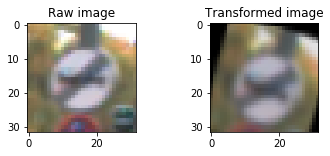

augmented train image data shape = (69598, 32, 32, 3)
augmented train image label shape = (69598,)


In [5]:
# data augmentation methods are defined below

def flip_image(img):
    # Horizontal flipping 
    img = np.fliplr(img)
    return img

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img, ang_range, shear_range, trans_range):
    '''
    NOTE: Some parts of this method was barrowed from:
    https://nbviewer.jupyter.org/github/vxy10/SCND_notebooks/blob/master/preprocessing_stuff/img_transform_NB.ipynb    
    '''
    # Rotation
    ang_rot = np.random.uniform(ang_range) - ang_range / 2
    rows, cols, ch = img.shape
    Rot_M = cv2.getRotationMatrix2D((cols / 2, rows / 2), ang_rot, 1)

    # Translation
    tr_x = trans_range * np.random.uniform() - trans_range / 2
    tr_y = trans_range * np.random.uniform() - trans_range / 2
    Trans_M = np.float32([[1, 0, tr_x], [0, 1, tr_y]])

    # Shear
    pts1 = np.float32([[5, 5], [20, 5], [5, 20]])

    pt1 = 5 + shear_range * np.random.uniform() - shear_range / 2
    pt2 = 20 + shear_range * np.random.uniform() - shear_range / 2

    pts2 = np.float32([[pt1, 5], [pt2, pt1], [5, pt2]])

    shear_M = cv2.getAffineTransform(pts1, pts2)

    img = cv2.warpAffine(img, Rot_M, (cols, rows))
    img = cv2.warpAffine(img, Trans_M, (cols, rows))
    img = cv2.warpAffine(img, shear_M, (cols, rows))
    
    img = augment_brightness_camera_images(img)

    return img

def display_raw_processed_img(img, img1):
    plt.figure(figsize=(6, 2))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Raw image")
    plt.subplot(1, 2, 2)
    plt.imshow(img1)
    plt.title("Transformed image")
    #plt.subplot(1, 3, 3)
    #plt.imshow(img2)
    #plt.title("Flipped image")
    plt.show()

# Augment data to the training datset
X_train_transformed = np.zeros_like(X_train)
#X_train_flip = np.zeros_like(X_train)
y_train_copy = np.copy(y_train)

for i in range(n_train):
    img = X_train[i]
    #X_train_flip[i] = flip_image(img)           
    X_train_transformed[i] = transform_image(img, 30, 5, 5)   
        
print("Total number of images in the augmented dataset = ", len(X_train_transformed)) #+ len(X_train_flip))

# display 10th image from training dataset and the corresponding augmented images
print(X_train[10,:,:,:].shape)
print(X_train_transformed[10,:,:,:].shape)

display_raw_processed_img(X_train[100,:,:,:], X_train_transformed[100,:,:,:])
  
# concatenate augmented data with training data
X_train_data = np.vstack((X_train_prep, X_train_transformed))
#X_train_data = np.vstack((X_train_data, X_train_flip))
y_train_data = np.concatenate((y_train, y_train_copy))
#y_train_data = np.concatenate((y_train_data, y_train_copy))
  
print("augmented train image data shape =", X_train_data.shape)
print("augmented train image label shape =", y_train_data.shape)

### Model Architecture

The architecture includes the LeNet architecture with a little modification. I have used two convolution layers with each followed by a max pooling layer and three fully connected layer to produce the logits. RELU activation unit was used. I also used regularization and dropout.

The input, output size of the layers are as follows:

Layer 1: Convolution Layer, Input = 32x32x3, Output = 28x28x6
         , Pooling: Input = 28x28x6, Output = 14x14x6
         
Layer 1: Convolution Layer, Input = 14x14x6, Output = 10x10x6
         , Pooling: Input = 10x10x6, Output = 5x5x16
         
Layer 1: Fully Connected Layer, Input = 400, Output = 1024

Layer 1: Fully Connected Layer, Input = 1024, Output = 1024

Layer 1: Fully Connected Layer, Input = 1024, Output = 43


In [6]:
### Define your architecture here.
### Parameters for the model
N_CLASSES = n_classes

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
        
    # Activation.
    conv1 = tf.nn.relu(conv1)
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
        
    # Activation.
    conv2 = tf.nn.relu(conv2)
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input
    fc1   = flatten(conv2)    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_shape = (fc1.get_shape().as_list()[-1], 120)
    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc1_shape), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc1, fc1_W) + fc1_b
        
    # Activation.
    fc1   = tf.nn.relu(fc1)
    # Regularization: Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 1024. Output = 1024.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    # Regularization: Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 1024. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, N_CLASSES), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(N_CLASSES))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, [conv1_W, conv2_W, fc1_W, fc2_W, fc3_W]

def regularization_cost(weights, regularization):
    reg_cost = 0.0
    for weight in weights:
        reg_cost += regularization * tf.nn.l2_loss(weight)
    return reg_cost

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

# Training parameters
EPOCHS = 340
BATCH_SIZE = 512
LEARNING_RATE = 0.001
REGULARIZER = 1e-6
MODEL_NAME = './LeNetTraffic.ckpt'

# placeholders for input images, labels and dropout percentage
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
tf.add_to_collection("x", x)  # Remember this Op.

y = tf.placeholder(tf.int32, (None))
tf.add_to_collection("y", y) 

# One-Hot-Encoding
one_hot_y = tf.one_hot(y, N_CLASSES)

keep_prob = tf.placeholder(tf.float32)
tf.add_to_collection("keep_prob", keep_prob) 

logits, weights = LeNet(x)
tf.add_to_collection("logits", logits)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy) #+ regularization_cost(weights, REGULARIZER)
tf.add_to_collection('loss_operation', loss_operation)

optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)


## Model Evaluation

In [8]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.add_to_collection('accuracy_operation', accuracy_operation)
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)            
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]        
        loss, accuracy = sess.run([loss_operation, accuracy_operation], 
                                   feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_loss / num_examples, total_accuracy / num_examples

def plot_learning_curves(training_losses, training_accuracies, dev_losses, dev_accuracies):
    import seaborn as sbs;
    sbs.set()
    epochs = np.arange(len(training_losses))
    plt.subplot(2, 1, 1)
    plt.plot(epochs, training_losses, color='#dd1c77', linewidth=2.0, label='training')
    plt.plot(epochs, dev_losses, color='#c994c7', linewidth=2.0, label='dev')

    # plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(epochs, training_accuracies, color='#dd1c77', linewidth=2.0, label='training')
    plt.plot(epochs, dev_accuracies, color='#c994c7', linewidth=2.0, label='dev')

    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()

    plt.savefig('learning_curves.jpg')
    plt.show()


## Train the model

Training conv-net for traffic sign classification...

Epoch:0 train loss:3.6715 valid loss:3.6310 train accuracy:0.0460 valid accuracy:0.0646

Epoch:20 train loss:1.4500 valid loss:0.8668 train accuracy:0.5356 valid accuracy:0.7324

Epoch:40 train loss:1.0159 valid loss:0.4831 train accuracy:0.6423 valid accuracy:0.8506

Epoch:60 train loss:0.8653 valid loss:0.3722 train accuracy:0.7113 valid accuracy:0.8837

Epoch:80 train loss:0.7604 valid loss:0.3173 train accuracy:0.7573 valid accuracy:0.9032

Epoch:100 train loss:0.7158 valid loss:0.3024 train accuracy:0.7594 valid accuracy:0.9029

Epoch:120 train loss:0.5725 valid loss:0.2900 train accuracy:0.8033 valid accuracy:0.9152

Epoch:140 train loss:0.6186 valid loss:0.2801 train accuracy:0.7845 valid accuracy:0.9168

Epoch:160 train loss:0.5071 valid loss:0.3005 train accuracy:0.8326 valid accuracy:0.9073

Epoch:180 train loss:0.4805 valid loss:0.2737 train accuracy:0.8285 valid accuracy:0.9177

Epoch:200 train loss:0.5579 valid loss:0.3

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


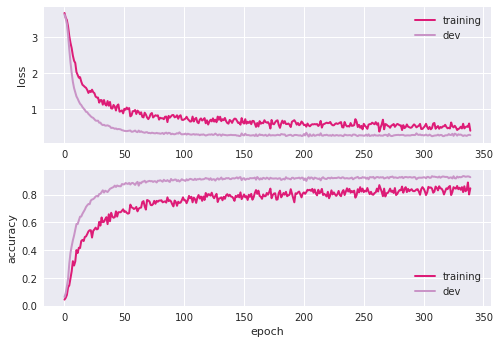

In [9]:
from sklearn.utils import shuffle

X_train_data, y_train_data = shuffle(X_train_data, y_train_data)

best_validation_accuracy = 1e-10
best_train_accuracy = 0

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())    
    num_examples = len(X_train_data)
    
    training_accuracies = []
    training_losses = []
    
    validation_accuracies = []
    validation_losses = []
    
    print("Training conv-net for traffic sign classification...")
    print()
    for epoch in range(EPOCHS):
        X_train_data, y_train_data = shuffle(X_train_data, y_train_data)        
        for offset in range(0, num_examples, BATCH_SIZE):           
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_data[offset:end], y_train_data[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})            
            
        # training loss and accuracy after an epoch
        loss_train, accuracy_train = sess.run([loss_operation, accuracy_operation], 
                                   feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})        
        training_losses.append(loss_train)
        training_accuracies.append(accuracy_train)
            
        validation_loss, validation_accuracy = evaluate(X_valid_prep, y_valid)
        validation_accuracies.append(validation_accuracy)
        validation_losses.append(validation_loss)
        
        if validation_accuracy > best_validation_accuracy:                
                saver.save(sess, MODEL_NAME, global_step = epoch)
                best_validation_accuracy = validation_accuracy
                best_train_accuracy = accuracy_train
                
        if epoch % 20 == 0:
            print('Epoch:{:d} train loss:{:.4f} valid loss:{:.4f} train accuracy:{:.4f} valid accuracy:{:.4f}'.format(
                    epoch, loss_train, validation_loss, accuracy_train, validation_accuracy)) 
            print()
        
    #saver.save(sess, './lenet')
    print("Model saved")
    print("Best validation accuracy", best_validation_accuracy)
    print("Training accuracy", best_train_accuracy)
    plot_learning_curves(training_losses, training_accuracies, validation_losses, validation_accuracies)

## Evaluate the model on Test dataset

In [13]:
with tf.Session(graph = tf.Graph()) as sess:
    saver = tf.train.import_meta_graph('./LeNetTraffic.ckpt-333.meta')
    saver.restore(sess,  tf.train.latest_checkpoint('.'))
        
    # Retrieve the collection
    x = tf.get_collection("x")[0]
    y = tf.get_collection("y")[0]
    keep_prob = tf.get_collection("keep_prob")[0]
    logits = tf.get_collection('logits')[0]
    accuracy_operation = tf.get_collection('accuracy_operation')[0]
    loss_operation = tf.get_collection('loss_operation')[0]
        
    test_loss, test_accuracy = evaluate(X_test_prep, y_test)
    print('Test Dataset Classification Accuracy: {:.4f}'.format(test_accuracy))

Test Dataset Classification Accuracy: 0.9074


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(32, 32, 3)


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


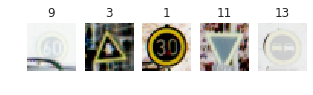

(32, 32, 3)


In [57]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import csv
import glob
import scipy.misc

def resize_image(image_name):
    image = plt.imread(new_image_dir + image_name)
    return scipy.misc.imresize(image, (32, 32))

#y_new_img = [16,1,38,33,38,18,25,9,1,4,21,20,27,38,33] # class for each new image
y_new_img = [9,3,1,11,13]

#Get traffic signs class names
traffic_class = []
signs_class=[]
with open('./signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        signs_class.append((row['SignName']))

#Get new test images
new_img_paths = [img_path for img_path in glob.glob("./new_images/*.ppm")]
new_test_img = np.uint8(np.zeros((5,32,32,3)))
for i, imp in enumerate(new_img_paths):
    img = cv2.imread(imp, cv2.IMREAD_COLOR)
    dim = (32, 32)
    res_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)    
    new_test_img[i] = res_img
    
#return scipy.misc.imresize(image, (32, 32))
X_resized_new_img = new_test_img.reshape((-1, 32, 32, 3)).astype(np.float32)
print(X_resized_new_img[1,:,:].shape)

#X_resized_new_img = [(resize_image(image), image[:-4]) 
#                          for image in os.listdir(new_image_dir)]

#Visualize new raw images
plt.figure(figsize=(5, 8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_resized_new_img[i])    
    plt.title(y_new_img[i])
    plt.axis('off')    
plt.show()

#pre-process new images before prediction
X_test_new_img = np.copy(X_resized_new_img)
#X_test_new_img = data_normalization(X_resized_new_img)
print(X_test_new_img[1,:,:,:].shape)


### Predict the Sign Type for Each Image and Analyze Performance

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


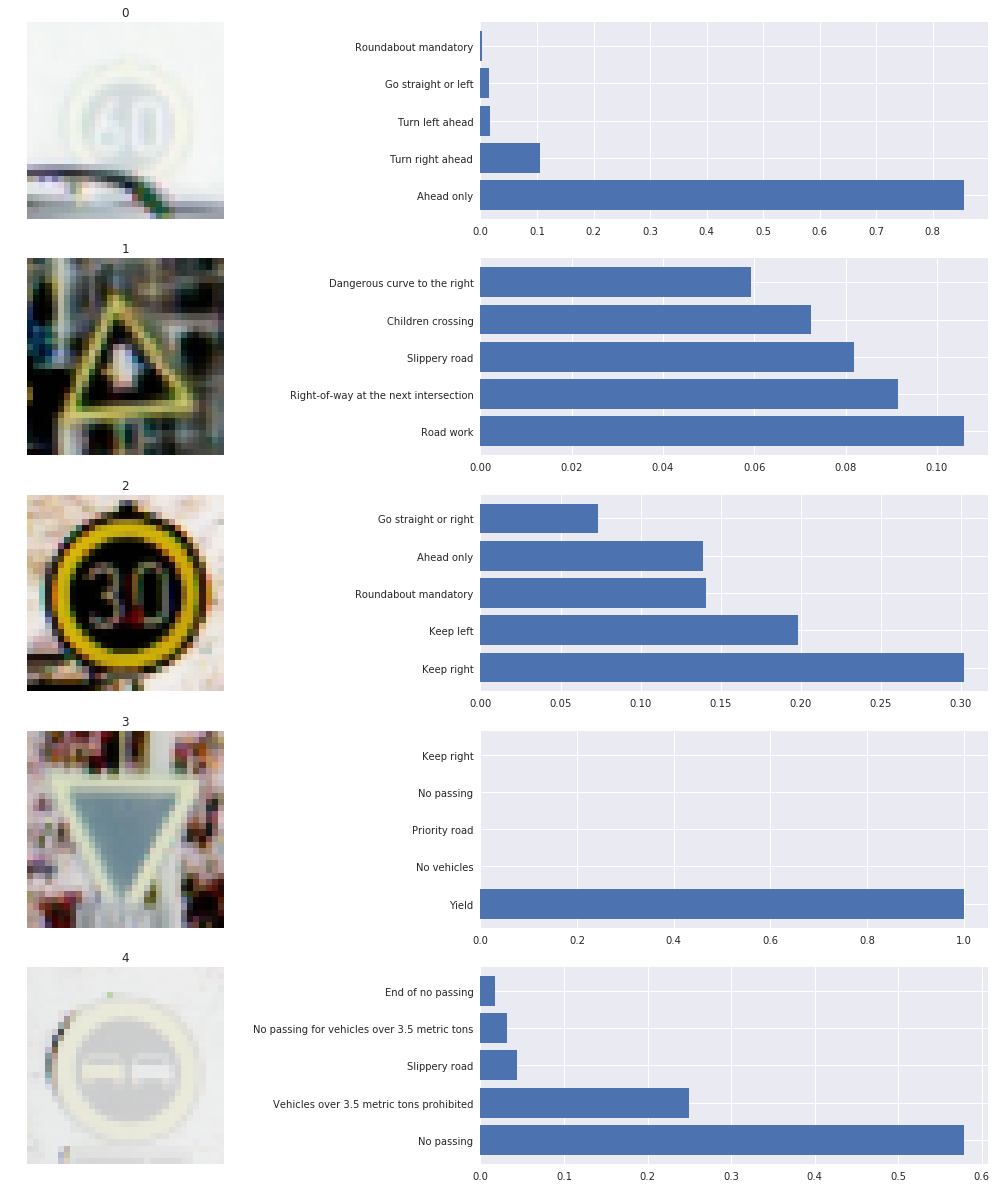

In [60]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session(graph = tf.Graph()) as sess:
    saver = tf.train.import_meta_graph('./LeNetTraffic.ckpt-333.meta')
    saver.restore(sess,  tf.train.latest_checkpoint('.'))
        
    # Retrieve the collection
    x = tf.get_collection("x")[0]
    y = tf.get_collection("y")[0]
    keep_prob = tf.get_collection("keep_prob")[0]
    logits = tf.get_collection('logits')[0]
    
    prob = tf.nn.softmax(logits)
    softmax_prob = sess.run(prob, feed_dict={x: X_test_new_img, keep_prob: 1.0})     
    top_5 = tf.nn.top_k(softmax_prob, k=5)
    top_5_results = sess.run(top_5) 
    
plt.figure(figsize=(20, 21))
for i in range(5):
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(X_test_new_img[i]) 
    plt.title(i)
    plt.axis('off')
    plt.subplot(5, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), top_5_results.values[i, :])
    labs=[signs_class[j] for j in top_5_results.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
    
plt.show()

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")